In [12]:
import pandas as pd
import joblib
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [7]:
data_path = '/Users/andreslopez/Desktop/ECE3039/Project/survey _lung_cancer.csv'
df = pd.read_csv(data_path)

xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')
xvar = df[['AGE']]
xvalue = pd.concat([df['GENDER'],xvalue], axis=1)
x_label = pd.concat([df['AGE'],xvalue], axis=1)
x_label = x_label.columns
xvalue = pd.get_dummies(xvalue)
X = pd.concat([xvar,xvalue], axis=1)
X = X.astype(int)
y = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)

X.head()

/var/folders/wh/5rf3n2rs4875gpzdn9xgsbnw0000gn/T/ipykernel_56225/889288378.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).applymap(lambda x: 'NO' if x == 1 else 'YES')


,AGE,GENDER_F,GENDER_M,SMOKING_NO,SMOKING_YES,YELLOW_FINGERS_NO,YELLOW_FINGERS_YES,ANXIETY_NO,ANXIETY_YES,PEER_PRESSURE_NO,...,ALCOHOL CONSUMING_NO,ALCOHOL CONSUMING_YES,COUGHING_NO,COUGHING_YES,SHORTNESS OF BREATH_NO,SHORTNESS OF BREATH_YES,SWALLOWING DIFFICULTY_NO,SWALLOWING DIFFICULTY_YES,CHEST PAIN_NO,CHEST PAIN_YES
0,69,0,1,1,0,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1
1,74,0,1,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
2,59,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
3,63,0,1,0,1,0,1,0,1,1,...,0,1,1,0,1,0,0,1,0,1
4,63,1,0,1,0,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0


In [28]:
# Step 2: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(2, 20)),  # specifying k from 2 to 19
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=84)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy')

grid_search.fit(X_train, y_train)
optimized_model = grid_search.best_estimator_

print(grid_search.best_estimator_)
print("Cross-validation accuracy:", grid_search.best_score_)


KNeighborsClassifier(n_neighbors=12)
Cross-validation accuracy: 0.8623673469387756


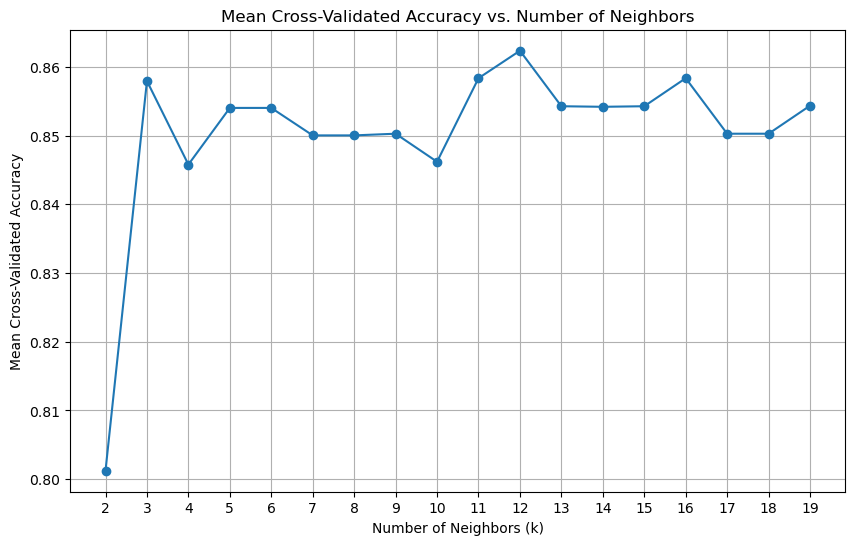

In [25]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
n_neighbors_values = param_grid['n_neighbors']

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, mean_test_scores, marker='o')
plt.title('Mean Cross-Validated Accuracy vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.xticks(n_neighbors_values)
plt.grid(True)
plt.show()

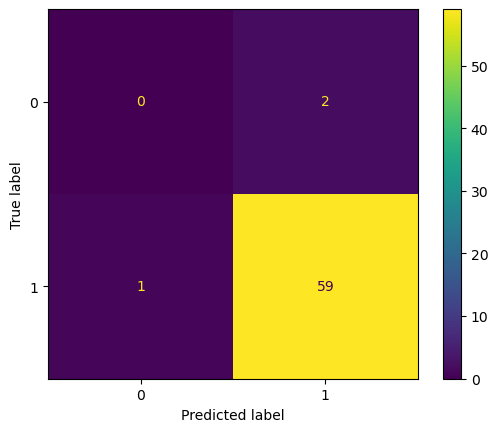


Precision: 0.9672131147540983
Recall: 0.9833333333333333
F1_score: 0.9752066115702478


In [27]:
y_pred = optimized_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show()

print(f'\nPrecision: {precision}')
print(f'Recall: {recall}')
print(f"F1_score: {f1}")